In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, MaxPool2D

In [2]:
batch_size = 32
epochs = 5
target_size = (256, 256)
folder_name = "amanneo"
directory = f"..\\Datasets\\{folder_name}\\Splitted_Dataset_2"

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)
validation_datagen = ImageDataGenerator(rescale=1/255.)

train_generator = train_datagen.flow_from_directory(
    directory=f"{directory}/train",
    batch_size=batch_size,
    class_mode='categorical',
    target_size=target_size,
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    directory=f"{directory}/test",
    batch_size=batch_size,
    class_mode="categorical",
    target_size=target_size,
    shuffle=False
)

validation_generator = validation_datagen.flow_from_directory(
    directory=f"{directory}/val",
    batch_size=batch_size,
    class_mode="categorical",
    target_size=target_size,
    shuffle=False
)

Found 21073 images belonging to 5 classes.
Found 7030 images belonging to 5 classes.
Found 7023 images belonging to 5 classes.


In [3]:
Network = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Flatten(),

    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])
Network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 127, 127, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 62, 62, 64)        0

In [4]:
Network.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

history = Network.fit(train_generator, epochs= epochs, verbose= 'auto', validation_data= validation_generator)

Epoch 1/5
659/659 [==============================] - 154s 231ms/step - loss: 0.9703 - accuracy: 0.7316 - val_loss: 0.8630 - val_accuracy: 0.7350
Epoch 2/5
659/659 [==============================] - 74s 112ms/step - loss: 0.8686 - accuracy: 0.7349 - val_loss: 0.8629 - val_accuracy: 0.7350
Epoch 3/5
659/659 [==============================] - 60s 90ms/step - loss: 0.8629 - accuracy: 0.7349 - val_loss: 0.8562 - val_accuracy: 0.7350
Epoch 4/5
659/659 [==============================] - 60s 91ms/step - loss: 0.8596 - accuracy: 0.7349 - val_loss: 0.8597 - val_accuracy: 0.7350
Epoch 5/5
659/659 [==============================] - 58s 89ms/step - loss: 0.8573 - accuracy: 0.7349 - val_loss: 0.8687 - val_accuracy: 0.7350


In [5]:
test_generator_loss, test_generator_accuracy = Network.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'test_generator Loss: {test_generator_loss}, test_generator Accuracy: {test_generator_accuracy}')

Network.evaluate(test_generator)

219/219 [==============================] - 35s 159ms/step - loss: 0.8656 - accuracy: 0.7366
test_generator Loss: 0.8655632138252258, test_generator Accuracy: 0.7365867495536804
220/220 [==============================] - 15s 69ms/step - loss: 0.8729 - accuracy: 0.7343


[0.8728624582290649, 0.7342816591262817]

In [6]:
print("Training Loss: ", history.history['loss'][-1])
print("Training Accuracy: ", history.history['accuracy'][-1])
print("Validation Loss: ", history.history['val_loss'][-1])
print("Validation Accuracy: ", history.history['val_accuracy'][-1])

Training Loss:  0.8572709560394287
Training Accuracy:  0.7348740100860596
Validation Loss:  0.8686619400978088
Validation Accuracy:  0.7350135445594788


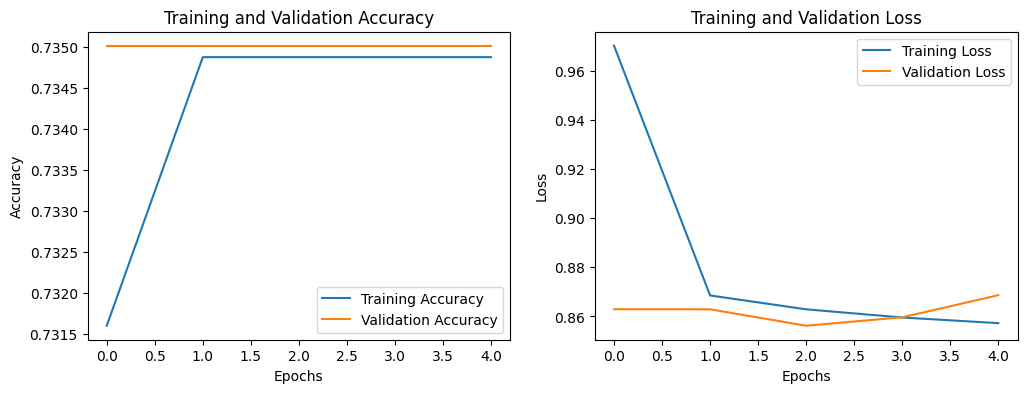

In [7]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(train_acc, label='Training Accuracy')
ax1.plot(val_acc, label='Validation Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend(loc='best')
ax1.set_title('Training and Validation Accuracy')

ax2.plot(train_loss, label='Training Loss')
ax2.plot(val_loss, label='Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend(loc='best')
ax2.set_title('Training and Validation Loss')

plt.show()

In [14]:
import os
from datetime import datetime
from nbconvert import HTMLExporter

folder_path = f"..\\Results\\{folder_name}"

if not os.path.exists(folder_path):
    os.makedirs(folder_path)

current_time = datetime.now().strftime("%H.%M_%d.%m.%Y")

html_filename = f"{current_time}.html"
html_file_path = os.path.join(folder_path, html_filename)

notebook_filename = "main_project.ipynb"
exporter = HTMLExporter()
output, _ = exporter.from_filename(notebook_filename)

with open(html_file_path, 'w', encoding='utf-8') as f:
    f.write(output)

print(f"Notebook saved to {folder_path} as {html_filename}")


Notebook saved to ..\Results\amanneo as 19.37_15.03.2024.html
